# <center><span style="color: blue">**ASSIGNMENT 1 - WINE ANALYSE**</span></center>

# <center><span style="color: blue">Load the data</span></center>

# Installing/Importing

In [7]:
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn import datasets, svm, tree, preprocessing, metrics

***

# 1. Load Wine Data

## Red wines

In [8]:
red_wines = pd.read_excel('./data/winequality-red.xlsx', skiprows=1)

In [9]:
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
red_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
red_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
red_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

***

## White Wines

In [13]:
white_wines = pd.read_excel('./data/winequality-white.xlsx', skiprows=1)

In [14]:
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
white_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [16]:
white_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
white_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

***

# 2. Joining datasets

In [18]:
red_wines['type'] = 'red'

In [19]:
white_wines['type'] = 'white'

In [20]:
# Merge the two files.
all_wines = pd.concat([red_wines, white_wines])

In [21]:
# Reset the index files, so every entry has their own id.
all_wines.reset_index(drop=True, inplace=True)

***

# <center><span style="color: blue">Exploring the data</span></center>

# 3. Explore the general parameters of the new file
- Number of rows and columns
- Type of data in each column
- Descriptive statstics of the numeric data (count, mean, min, max, std, quantiles)

In [22]:
all_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [23]:
all_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

### Count

In [24]:
all_wines['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:>

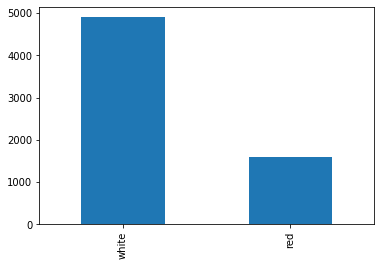

In [25]:
all_wines['type'].value_counts().plot.bar()

***

### Mean

In [26]:
all_wines.mean()

C:\Users\marti\AppData\Local\Temp\ipykernel_16460\454274112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_wines.mean()


fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

***

### Minimum scores

In [27]:
all_wines.min()

fixed acidity               3.8
volatile acidity           0.08
citric acid                 0.0
residual sugar              0.6
chlorides                 0.009
free sulfur dioxide         1.0
total sulfur dioxide        6.0
density                 0.98711
pH                         2.72
sulphates                  0.22
alcohol                     8.0
quality                       3
type                        red
dtype: object

***

### Maximum Scores

In [28]:
all_wines.max()

fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                 0.611
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
quality                       9
type                      white
dtype: object

***

### Quantiles

In [29]:
all_wines.quantile([0, 0.25, 0.5, 0.75, 1])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.00,3.8,0.08,0.00,0.6,0.009,1.0,6.0,0.98711,2.72,0.22,8.0,3.0
0.25,6.4,0.23,0.25,1.8,0.038,17.0,77.0,0.99234,3.11,0.43,9.5,5.0
0.50,7.0,0.29,0.31,3.0,0.047,29.0,118.0,0.99489,3.21,0.51,10.3,6.0
0.75,7.7,0.40,0.39,8.1,0.065,41.0,156.0,0.99699,3.32,0.60,11.3,6.0
1.00,15.9,1.58,1.66,65.8,0.611,289.0,440.0,1.03898,4.01,2.00,14.9,9.0


In [37]:
all_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


***

# 4. Plot diagrams that visualize the differences in red and white wines. 
- What do your diagrams show? 
- Can you tell which type of wine has higher average quality? 
- Which type of wine has higher average level of alcohol? 
- Which one has higher average quantity of residual sugar? 

### <span style="color:blue">*What do your diagrams show?*</span>

In [ ]:
all_wines.groupby('type').mean().plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [ ]:
# Dividing the variables into different charts, to make sure that all values can be read by human eyes.
categories_1 = ['volatile acidity', 'citric acid', 'chlorides', 'sulphates']
categories_2 = ['fixed acidity', 'residual sugar', 'density', 'pH', 'alcohol', 'quality']
categories_3 = ['free sulfur dioxide', 'total sulfur dioxide']

In [ ]:
all_wines.groupby('type')[categories_1].mean().plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [ ]:
all_wines.groupby('type')[categories_2].mean().plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [ ]:
all_wines.groupby('type')[categories_3].mean().plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [ ]:
white_wines.mean(numeric_only=True).plot.pie(autopct = '%1.1f%%', figsize=(15, 15), ylabel='Total average of each column')

In [ ]:
# Average value of all columns.
all_wines.groupby('type').mean()

### <span style="color:blue">*Can you tell which type of wine has higher average quality?*</span>

In [ ]:
all_wines.groupby('type')['quality'].mean()

### <span style="color:blue">*Which type of wine has higher average level of alcohol?*</span>

In [ ]:
all_wines.groupby('type')['alcohol'].mean()

### <span style="color:blue">*Which one has higher average quantity of residual sugar?*</span>

In [ ]:
all_wines.groupby('type')['residual sugar'].mean()

***

# 5. Split the data into five subsets by binning the attribute pH. 
- Identify the subset with the highest density? 
- What if you split the data in ten subsets?

## <span style=color:orange>The most straightforward way of creating subsets...</span>

In [ ]:
# Creating subsets based on hardcoded values
subset_1 = all_wines.loc[all_wines.pH <= 3 ]
subset_2 = all_wines.loc[(all_wines.pH > 3) & (all_wines.pH < 3.25)]
subset_3 = all_wines.loc[(all_wines.pH > 3.25) & (all_wines.pH < 3.50)]
subset_4 = all_wines.loc[(all_wines.pH > 3.50) & (all_wines.pH < 3.75)]
subset_5 = all_wines.loc[(all_wines.pH > 3.75)]

In [ ]:
# Printing the count of entries in each subset
print(len(subset_1))
print(len(subset_2))
print(len(subset_3))
print(len(subset_4))
print(len(subset_5))

In [ ]:
# Showing the count of rows in subsets in a 'Bar Plot'
pd.Series([len(subset_1), len(subset_2), len(subset_3), len(subset_4), len(subset_5)],[1, 2, 3, 4, 5]).plot(kind='barh', figsize=(10, 5))

## <span style=color:orange>Better way of creating subsets...</span>

In [ ]:
# Identifying where to split the dataframe, to create equal sized subsets.
all_wines['pH'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
subset_1 = all_wines.loc[(all_wines['pH'] <= 3.08)]
subset_2 = all_wines.loc[(all_wines['pH'] <= 3.17) & (all_wines['pH'] > 3.08)]
subset_3 = all_wines.loc[(all_wines['pH'] <= 3.25) & (all_wines['pH'] > 3.17)]
subset_4 = all_wines.loc[(all_wines['pH'] <= 3.35) & (all_wines['pH'] > 3.25)]
subset_5 = all_wines.loc[(all_wines['pH'] > 3.35)]


In [ ]:
# Showing the count of rows in subsets in a 'Bar Plot'
pd.Series([len(subset_1), len(subset_2), len(subset_3), len(subset_4), len(subset_5)],[1, 2, 3, 4, 5]).plot(kind='barh', figsize=(10, 5))

***

# 6. Use the function corr() to create a correlation matrix of all data and investigate it. 
- Can you tell which vine attribute has the biggest influence on the wine quality? 
- Do you get the same results when you analyze the red and white wine data sets separately?

### <span style="color:blue">*Which wine attribute has the biggest influence on the wine quality?*</span>

In [ ]:
all_wines.corr()

### <span style="color:green"><u>Conclusion:</u></span>
### <span style="color:green"><u>Alcohol</u> has the biggest influence on wine quality.</span>

### <span style="color:blue">*Do you get the same results when you analyze the red and white wine data sets separately?*</span>

In [ ]:
red_wines.corr()

In [ ]:
white_wines.corr()

### <span style="color:green"><u>Conclusion:</u></span>
### <span style="color:green">It's still <u>alcohol</u> which has the biggest influence on wine quality. </span>
### <span style="color:green">Though it's worth to notice that <u>sulphates</u> has much bigger effect on quality in red wines, than in white wines.</span>

***

# <center><span style="color: blue">Prepare the data for further analysis</span></center>

# 7. Search the data for allocating
- Missing values
- Cells with a value of ‘0’ (zero)

Replace these values with the average value of their column.

***

### <span style="color: blue">*Finding missing values*</span>

In [ ]:
all_wines.isnull().sum()

In [ ]:
(all_wines == 0).sum()

***

### <span style="color: blue">*Replace these values with the average value of their column.*</span>

#### Checking the values of red, white and both.

In [ ]:
all_wines['citric acid'].mean()

In [ ]:
red_wines['citric acid'].mean()

In [ ]:
white_wines['citric acid'].mean()

#### Inserting average values of missing fields.

In [ ]:
red_wines['citric acid']=red_wines['citric acid'].replace(0,red_wines['citric acid'].mean())

In [ ]:
white_wines['citric acid']=white_wines['citric acid'].replace(0,white_wines['citric acid'].mean())

In [ ]:
all_wines = pd.concat([red_wines, white_wines])
# Reset the index files, so every entry has their own id.
all_wines.reset_index(drop=True, inplace=True)

In [ ]:
(all_wines == 0).sum()

In [ ]:
all_wines['citric acid'].mean()

In [ ]:
red_wines['citric acid'].mean()

In [ ]:
white_wines['citric acid'].mean()

### Here we can see the impact that it made on average "Citric Acid" values: 
#### - All wines = 0.3186 --> 0.3251
#### - Red wines = 0.2710 --> 0.2933
#### - White wines = 0.3342 --> 0.3355
### So maybe not the biggest impact, but still important to make more accurate statistics

***

# 8. Explore the feature ‘residual sugar’. 
- Is there any outlier (a value much different from the rest)? 
- On which row is it found? 
- Remove that row.

In [ ]:
all_wines['residual sugar'].mean()

In [ ]:
temp_wines = all_wines.sort_values(by = "residual sugar")

In [ ]:
temp_wines.tail()

#### On which row is it found?
#### <u>Row 4380</u> as we can see above
#### Remove that row

In [ ]:
all_wines.index[4380]

In [ ]:
all_wines = all_wines[all_wines['residual sugar'] != 65.80]

In [ ]:
all_wines.index[4380]

# 9. Identify the attribute with the lowest correlation to the wine quality and remove it.

In [ ]:
all_wines.corr()

#### <span style="color: green">The attribute with the lowest impact on quality is <u>pH</u>. (Closest to zero.)</span>

In [ ]:
all_wines = all_wines.drop(['pH'], axis = 1)

In [ ]:
all_wines.head()

# 10. Finally, transform categorical data into numeric and print out the start and the end of the preprocessed data frame.

#### The only categorical data, is the column called 'type', which was created in the beginning
#### Changing it so <span style="color: red">red = 0</span> and <span style="color: blue">white = 1</span>:

In [ ]:
all_wines['type'].replace(['red', 'white'], [0, 1], inplace=True)

In [ ]:
all_wines.head()

In [ ]:
all_wines.tail()